# Pool version 0.1 (TEST)

Only modify the code in section "Definition of the initial parameters"

In [1]:
# Dependences
import pandas as pd
import numpy as np

# # radCAD
from radcad import Model, Simulation, Experiment
from radcad.engine import Engine, Backend

# Internal packages
from model.parts.utils import *
from model.state_variables import initial_state
from model.state_update_blocks import state_update_blocks
from model.sys_params import sys_params

# Experiments
pd.options.display.float_format = '{:.2f}'.format

## Definition of the initial parameters

The parameters of the simulation can be edited here.

Do not change any variable name.

In [2]:
# ************************************
# Editable      **********************

# Pool initial parameters

num_token_A = int(1000000/0.7)
num_token_B = 1000000
initial_state['num_token_A'] = num_token_A
initial_state['num_token_B'] = num_token_B
initial_state['value_token_A'] = 0.7
initial_state['value_token_B'] = 1
# Total liquidity in pool
initial_state['liquidity'] = num_token_A*num_token_B                              

# Simulation parameters

MONTE_CARLO_RUNS = 1
TIMESTEPS = 100

# End Editable  **********************
# ************************************

## Simulations

Nothing should be changed on the code from here on

In [3]:
model = Model(initial_state=initial_state, params=sys_params, state_update_blocks=state_update_blocks)
simulation = Simulation(model=model, timesteps=TIMESTEPS, runs=MONTE_CARLO_RUNS)

result = simulation.run()
df = pd.DataFrame(result)

In [4]:
# Printing different data: 
# Selected data
df[['agent', 'trader_action', 'investor_action', 'buyer_action']]
#df[['mempool']]
list_df = df[['mempool']].values.tolist()
list_df[5]


[[['trader', 923, 923, 4410.243462372, 0.6995482317519346, 55.9264802790358],
  ['investor',
   -1000,
   4000,
   10743.629831637285,
   0.6898235915002642,
   53.806240137020595],
  ['buyer',
   625,
   14811,
   471.9096306224858,
   0.6860051160216452,
   42.01781335632577],
  ['trader',
   766,
   766,
   4509.155716805979,
   0.6926488890773339,
   39.72476583921657],
  ['trader',
   635,
   635,
   4598.136233374731,
   0.6870807371717161,
   34.432501478770824],
  ['investor',
   469,
   5469,
   9705.378587910835,
   0.6927921241015823,
   30.298094114477216],
  ['investor',
   -237,
   4763,
   10178.10670112521,
   0.6874964029395809,
   15.170053628530958],
  ['investor',
   -217,
   4783,
   10165.180542078504,
   0.7001065562178563,
   13.257419379229516],
  ['investor',
   128,
   5128,
   9921.46991487647,
   0.6862414096574254,
   9.30881531262148],
  ['Foundation', 0, 0, 0, 0, 0],
  ['Foundation', 0, 0, 0, 0, 0],
  ['trader', 0, 0, 5000, 0, 0],
  ['Foundation', 0, 0, 

## Plots

From here on, we are showing the results of the simulations

1. Token price evolution: evolution of the price of our token according to the actions taken by the agents.
Agents are buying/selling tokens and changing the ratio $token_a/token_b$. Prices evolve according to the equilibrium defined by the pool.

The price of the ancore token ($token_b$) remains constant through all the simulation $p_b = 1$


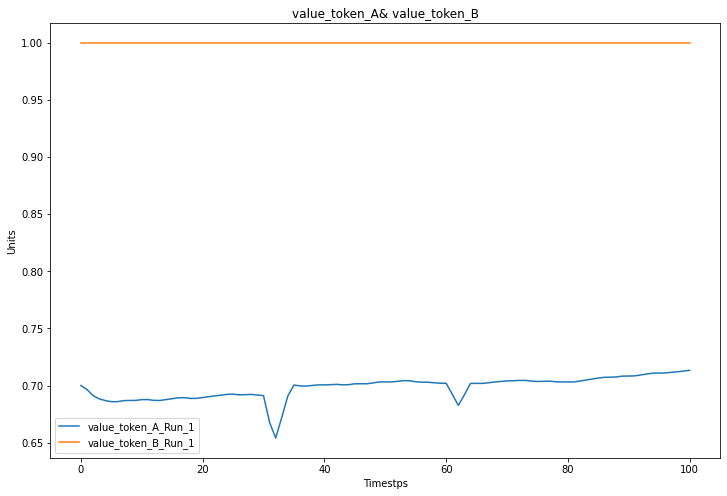

In [5]:
from model.parts.visualizations import montecarlo_plot
montecarlo_plot(df, ['value_token_A', 'value_token_B'], runs=MONTE_CARLO_RUNS)

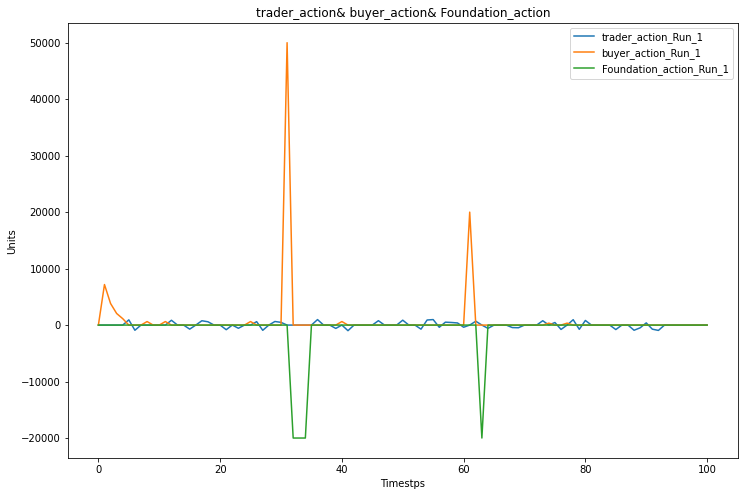

In [6]:
montecarlo_plot(df, ['trader_action', 'buyer_action', 'Foundation_action'], runs=MONTE_CARLO_RUNS)

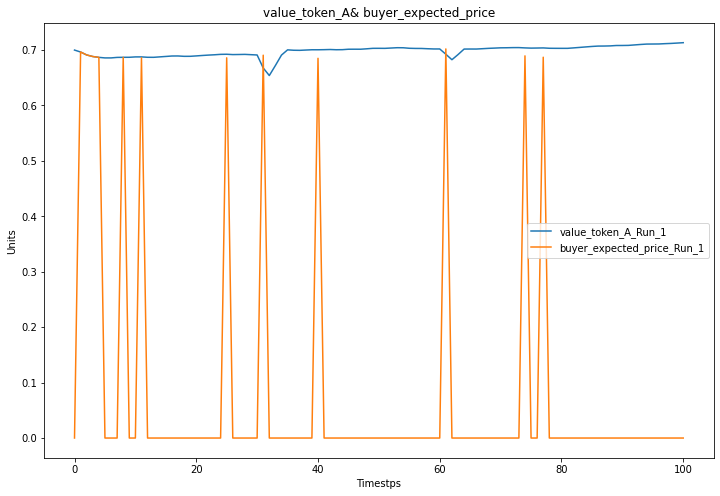

In [7]:
montecarlo_plot(df, ['value_token_A', 'buyer_expected_price'], runs=MONTE_CARLO_RUNS)